<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/Unsupervised_Machine_Learning_2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Data Clustering

## Section 1: k-Means Clustering

k-Means is a **partition-based clustering algorithm** that groups data points into a predefined number of **k clusters** based on similarity. Each cluster is represented by a **centroid**, and the goal is to minimize the distance between data points and their respective centroids.


### Step 1: Load the data

In [118]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Importing data and transforming using PCA
df = pd.read_csv('/content/drive/MyDrive/unsupervised_machine_learning_2/winequality-red.csv')

# View the data
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Step 2: Data Pre-processing

### 2.1 Check Summary Stats

In [121]:
# Check the summary stats
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 2.2 Remove outliers

In [122]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    upper_Limit = data.quantile(0.75) + 1.5 * (data.quantile(0.75) - data.quantile(0.25))
    lower_Limit = data.quantile(0.25) - 1.5 * (data.quantile(0.75) - data.quantile(0.25))

    print("Lower Limits:\n", lower_Limit)
    print("Upper Limits:\n", upper_Limit)
    print("Minimum values in data:\n", data.min())
    print("Maximum values in data:\n", data.max())


    # Create a boolean DataFrame showing which elements are outliers
    is_outlier = (data < lower_Limit) | (data > upper_Limit)
    print("Boolean DataFrame indicating outliers:\n", is_outlier.head())

    # Count how many True values (outliers) there are per column
    print("Number of outliers per column:\n", is_outlier.sum())

    # Count how many rows have at least one outlier
    rows_with_outliers = is_outlier.any(axis=1)
    print("Number of rows with at least one outlier:", rows_with_outliers.sum())

    outliers_df = data[rows_with_outliers]
    trimmed_df = data[~rows_with_outliers] # Select rows where *no* element is an outlier


    print("Shape of rows identified as outliers:", outliers_df.shape)
    print("Shape of trimmed data (rows with no outliers):", trimmed_df.shape)


    return outliers_df, trimmed_df


# Make a copy of the original data
original_df = df.copy()

# Detecting and removing outliers for all features except 'quality'
outliers_df, trimmed_df = detect_outliers_iqr(df.drop('quality', axis=1))

# Check the size of the original and cleaned data
print("Original data shape:", original_df.shape)
print("Trimmed data shape:", trimmed_df.shape) # This will now reflect rows with no outliers



Lower Limits:
 fixed_acidity            3.950000
volatile_acidity         0.015000
citric_acid             -0.405000
residual_sugar           0.850000
chlorides                0.040000
free_sulfur_dioxide    -14.000000
total_sulfur_dioxide   -38.000000
density                  0.992248
pH                       2.925000
sulphates                0.280000
alcohol                  7.100000
dtype: float64
Upper Limits:
 fixed_acidity            12.350000
volatile_acidity          1.015000
citric_acid               0.915000
residual_sugar            3.650000
chlorides                 0.120000
free_sulfur_dioxide      42.000000
total_sulfur_dioxide    122.000000
density                   1.001187
pH                        3.685000
sulphates                 1.000000
alcohol                  13.500000
dtype: float64
Minimum values in data:
 fixed_acidity           4.60000
volatile_acidity        0.12000
citric_acid             0.00000
residual_sugar          0.90000
chlorides               0.01

### 2.2 Perform Scaling

In [123]:
# Import required libraries
from sklearn.preprocessing import StandardScaler


# Scale the data for clustering
trimmed_df_scaled = StandardScaler().fit_transform(trimmed_df)
trimmed_df_scaled_df = pd.DataFrame(trimmed_df_scaled, columns=trimmed_df.columns)




### 2.3 Reduce Dimensions using PCA

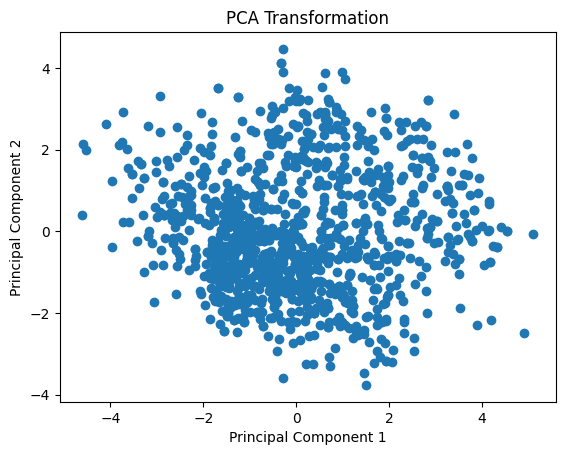

In [124]:
# Import required modules
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions to 2
X_pca = PCA(n_components=2).fit_transform(trimmed_df_scaled)

# Plot the PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Transformation')
plt.show()


### Step 3: Apply Clustering

In [125]:
# Import libraries
from sklearn.cluster import KMeans

In [126]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)

KMeans(n_clusters=3)

In [127]:
# Print k-means labels
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 0], dtype=int32)

### 3.1 Find the Optimal Number of Clusters
- Elbow Method
- Silhoutte Analysis


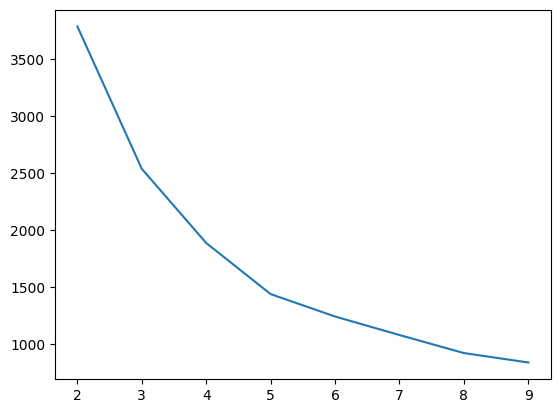

In [128]:
## Elbow-curve/SSD Method
# Using the Elbow Method to find the optimal number of clusters

# List to store the Sum of Squared Distances (SSD) for each number of clusters
ssd = []

# Loop through each cluster count in the defined range
for num_clusters in range(2, 10):

    # Initialize KMeans with the current number of clusters and fixed random state for reproducibility
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, random_state=123)

    # Fit the KMeans model on the final PCA-transformed dataset
    kmeans.fit(X_pca)

    # Append the inertia (SSD) of the current model to the list
    ssd.append(kmeans.inertia_)


# Plotting the Elbow Curve
plt.plot(range(2, 10), ssd)



In [ ]:
## Interpretation

"""
3 or 4 clusters seem to be clear elbow points for this data.
"""

In [129]:
# silhouette analysis

#Import module
from sklearn.metrics import silhouette_score

# Initialize the range of clusters
clusgter_range = range(2, 10)

# For every cluster value, find silhoutte score
for num_clusters in clusgter_range:

    # Intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca)

    cluster_labels = kmeans.labels_

    # Calculate & print silhouette score
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))




For n_clusters=2, the silhouette score is 0.3727217210233641
For n_clusters=3, the silhouette score is 0.3816168145720877
For n_clusters=4, the silhouette score is 0.3655863372508702
For n_clusters=5, the silhouette score is 0.36495612768814856
For n_clusters=6, the silhouette score is 0.3575677483953846
For n_clusters=7, the silhouette score is 0.35172250387006093
For n_clusters=8, the silhouette score is 0.33209258438374467
For n_clusters=9, the silhouette score is 0.3370729872907456


In [ ]:
## Interpretation

"""
The Silhouette Score for this itteraton of the k-Means tests shows that the optimal number of clusters is 3.
3 is where the silhouette score is highest and after that, the score decreases.
"""

### 3.2 Build the final model with optimal 'k' value

In [130]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=1000)
kmeans.fit(X_pca)

KMeans(max_iter=1000, n_clusters=3)

In [137]:
# Create a dataframe for the features with reduced dimensions - X_pca
kmeans_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add a column for storing the kmeans labels
kmeans_pca_df['cluster'] = kmeans.labels_

# Chech teh cluster labels
print(kmeans_pca_df.cluster.unique())


[2 1 0]


In [138]:
# Checking a few values
print(kmeans_pca_df.head())

        PC1       PC2  cluster
0 -1.612161 -1.339350        2
1 -0.365001 -2.638215        2
2 -0.406673 -1.720919        2
3  2.929841  0.311051        1
4 -1.612161 -1.339350        2


Text(0, 0.5, 'Principal Component 2')

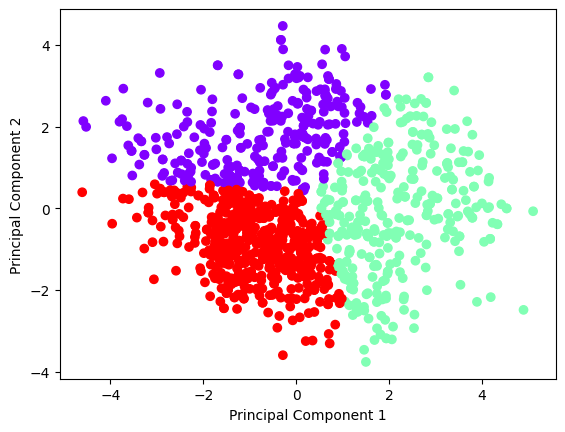

In [139]:
# Scatter plot of the two principal components to observe the cluster distribution
plt.scatter(kmeans_pca_df['PC1'], kmeans_pca_df['PC2'], c=kmeans_pca_df['cluster'], cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [ ]:
## Interpretation

"""
This shows three distict clusters with minimal overlap.
This is a futher indication that 3 clusters are appropriate for this data in the K-Means model.
"""

## Section 2: Hierarchical Clustering


Hierarchical clustering is an **unsupervised learning algorithm** that builds a hierarchy of clusters, represented using a **dendrogram** (tree-like structure).


In [142]:
# Import libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.cluster import AgglomerativeClustering

### Do hierarchical clustering via complete linkage

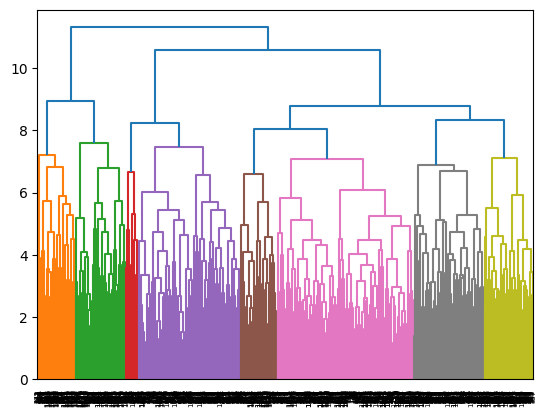

In [144]:
## Complete Linkage

# Generate the hierarchical clustering linkage matrix using 'complete' linkage method
# 'complete' linkage: Uses the maximum distance between points of two clusters to determine merging.
# 'euclidean': Uses Euclidean distance to compute the pairwise distances between observations.
cl_mergings = linkage(trimmed_df_scaled_df, method="complete", metric='euclidean')


# Plot the dendrogram to visualize the hierarchical clustering
# The dendrogram displays the hierarchy of merges with each leaf representing a data point,
# and branches showing at what distance clusters are merged.
dendrogram(cl_mergings)


# Display the plot
plt.show()



In [146]:
## Create complete linkage cluster labels choosing number of clusters to be 3

# Extract cluster labels by cutting the dendrogram to form 3 clusters
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=3).reshape(-1, )
# 'cut_tree()' cuts the hierarchical clustering dendrogram to create a fixed number of clusters.
# 'n_clusters=3' specifies the number of clusters to extract.
# 'reshape(-1, )' flattens the resulting array to a 1D array of cluster labels.


### Plot the hierarchical clustering graph

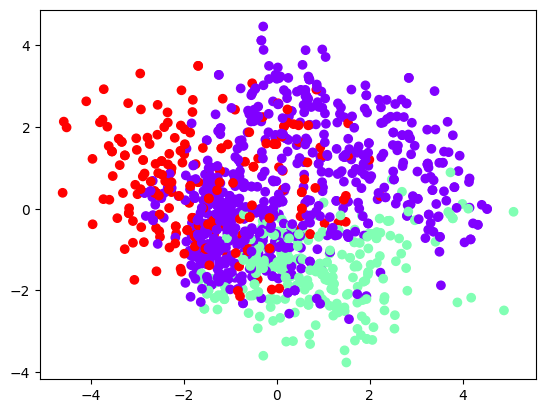

In [147]:
# Create a dataframe for features with reduced dimensions using pca
cl_hier_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add a column to store the hierarchical clustering labels
cl_hier_pca_df['cluster'] = cl_cluster_labels

# scatter plot using the first two principal components to observe the cluster distribution
plt.scatter(cl_hier_pca_df['PC1'], cl_hier_pca_df['PC2'], c=cl_hier_pca_df['cluster'], cmap='rainbow')

In [ ]:
## Interpretation

"""
Visually, the Hierarchical method didn't do as good of a job at segmeting the data as K-Means.
There is a lot of overlap between the clusters and boundaries are not clearly defined.
"""

## Section 3: Density based Clustering


Density-based clustering identifies clusters as dense regions of data points separated by areas of low density. It works well with arbitrary-shaped clusters and can detect outliers effectively.


In [148]:
# Import libraries
from sklearn.cluster import DBSCAN

In [149]:
# DBSCAN model
# Initialize the DBSCAN clustering model with eps = 0.5, min_samples=4
dbscan = DBSCAN(eps=0.5, min_samples=4)
# 'eps=0.5': Defines the maximum distance between two points to be considered as neighbors.
#            A smaller value results in smaller, denser clusters, while a larger value allows more points in clusters.
# 'min_samples=4': The minimum number of points (including the core point) required to form a dense region (cluster).
#                  Points with fewer neighbors become noise or border points.

# Fit the model
dbscan.fit(X_pca)

DBSCAN(min_samples=4)

In [154]:
## Print DBSCAN labels

# Import np and change print options threshold to allow the entire array to be printed
import numpy as np
np.set_printoptions(threshold=np.inf)


# Noisy samples are given the label -1
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [155]:
# Print silhouette score
silhouette_score(X_pca, dbscan.labels_)


np.float64(0.23001359157596607)

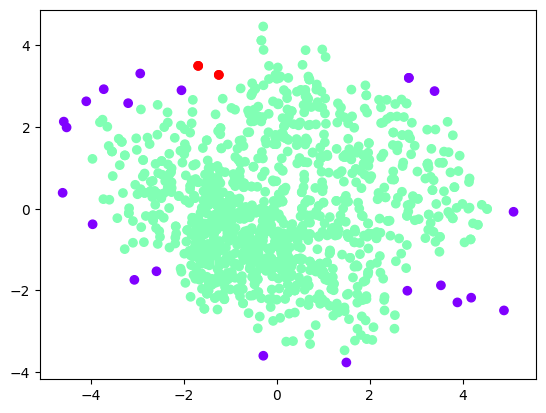

In [156]:
# Create a dataframe for features with reduced dimensions
DBSCAN_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Add a column to store the dbscan labels
DBSCAN_pca_df['cluster'] = dbscan.labels_

# scatter plot using the first two principal components to observe the cluster distribution
plt.scatter(DBSCAN_pca_df['PC1'], DBSCAN_pca_df['PC2'], c=DBSCAN_pca_df['cluster'], cmap='rainbow')

In [ ]:
## Interpretation

"""
DBSCAN did not perform as well as K-Means when generating clusters either.  It created one centralized main cluster based off the density of this region.
However, DBSCAN did excel in pinpointing outliers on this data.  This outlier detection is extra impressive because I already did outlier
removal with the IQR method during my data preprocessing/ prep phase.  So, this exemplifies how well DBSCAN performs when it comes to outlier detection.
"""
